## Домашнее задание "Теория вероятности. Дискретные Случайные Величины"

### Уровень 0

*Задание 1:*

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов.



Простое число (из таблицы простых чисел) - это 2, 3, 5, 7, 11, 13 (берем до 15).

По формуле Бернулли вычислим вероятности выпадения орла для каждого из этих простых чисел и затем их сложим.

In [1]:
# вероятность выпадения орла в каждом броске - 1/2, также как и решки
# зададим переменные: вероятность успеха (p), список простых чисел (k) и количество бросков (n)
p = 0.5
k = [2,3,5,7,11,13]
n = 15

In [2]:
# в формуле Бернулли используется факториал, импортируем нужный модуль
import math

In [3]:
# рассчитаем вероятность выпадения простого числа орлов
# (значения Р и 1-Р равны, дополнительных переменных, согласно формуле Бернулли, не вводим)
p_total = 0

for kk in k:
    # расчет количества сочетаний через факториал 
    c = math.factorial(n) / (math.factorial(kk) * math.factorial(n-kk))
    # формула Бернулли
    p_sum = c * p**kk * p**(n-kk)
    
    p_total += p_sum

print('Вероятность выпадения простого числа орлов -', round(p_total, 3))

Вероятность выпадения простого числа орлов - 0.35


*Задание 2:*

Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.



In [4]:
import numpy as np

In [5]:
# создадим массив дискретных целочисленных случайных величин
rand = np.random.randint(low=1, high=21, size=20)
rand

array([15, 15, 19, 19, 10,  5, 20, 19, 10, 15, 17,  5,  8, 14, 19, 10,  8,
        4,  9, 10])

In [6]:
# создадим новый массив из 1000 случайных значений массива rand
rand_1000 = np.random.choice(rand, 1000)

In [7]:
import matplotlib.pyplot as plt

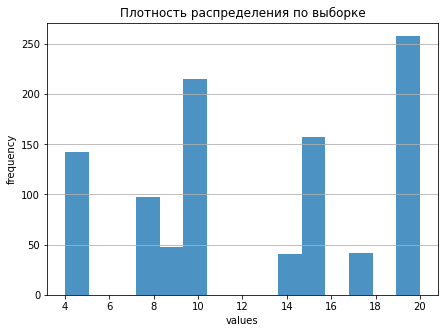

In [8]:
# построим гистограмму плотности распределения по выборке
plt.figure(figsize=(7,5))
plt.hist(rand_1000, bins=15, alpha=0.8)

plt.title('Плотность распределения по выборке')
plt.xlabel('values')
plt.ylabel('frequency')

plt.grid(axis='y')

In [9]:
# посчитаем среднее значение по выборке
round(np.mean(rand_1000),1)

12.6

In [10]:
# дисперсию
round(np.var(rand_1000),1)

26.1

In [11]:
# и медиану
np.median(rand_1000)

10.0

In [12]:
# интересно посмотреть на самое частое значение в выборке (моду)
import statistics
statistics.mode(rand_1000)

10

### Уровень 1

*Задание 3:*

Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

1. Определим количество всех возможных элементарных исходов.

У каждой монеты 2 стороны, всего 3 монеты, поэтому $2^3 = 8$ исходов (сочетаний орлов и решек).

2. Определим вероятность каждого из событий - А1, А2 и А3.

В каждом событии - одинаковый результат: две монеты из трех выпадают одной и той же стороной (здесь не берем в расчет какие именно монеты). Комбинации такие: два орла + третья монета или орел, или решка; две решки + третья монета или орел, или решка, т.е. всего 4 варианта из 8-ми возможных.

Поэтому вероятность событий $А1 = А2 = А3 = \frac{4}{8} = \frac{1}{2}$.

3. Проверим являются ли события A1, A2 и A3 попарно независимыми (проверим на А1 и А2).

Для этого должно выполняться равенство: $Р(А1А2) = Р(А1)\cdotР(А2)$, т.е. вероятность совместного осуществления событий А1 и А2 равна произведению вероятностей этих событый.

Совместный результат А1 и А2 - все три монеты упали одной стороной: или орлом, или решкой, т.е. всего 2 варианта из 8-ми возможных.

Поэтому $Р(А1А2) = \frac{2}{8} = \frac{1}{4}$. И произведение $Р(А1)\cdotР(А2) = \frac{1}{2}\cdot\frac{1}{2} = \frac{1}{4}$. Значения равны, значит, события независимы.

В других парах событий - такая же ситуация, т.е. все три события являются попарно независимыми.

4. Проверим являются ли события А1, А2 и А3 независимыми в совокупности.

Здесь должно выполняться следующее равенство: $Р(А1А2А3) = Р(А1)\cdotР(А2)\cdotР(А3)$, смысл которого аналогичен описанному выше.

Совместный результат А1, А2 и А3 - тоже выпадение всех трех монет одной стороной, такие же 2 варианта из 8-ми возможных, т.е. $Р(А1А2А3) = \frac{1}{4}$. Но произведение $Р(А1)\cdotР(А2)\cdotР(А3) = \frac{1}{2}\cdot\frac{1}{2}\cdot\frac{1}{2} = \frac{1}{8}$. В данном случае значения не равны, следовательно, три события не являются независимыми в совокупности.

*Задание 4 (формула полной вероятности):*

В магазин привезли устройства с 3-х разных предприятий.

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта.

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [13]:
# вероятность купить продукцию каждого из предприятий
P_h1 = 0.2
P_h2 = 0.3
P_h3 = 0.5

In [14]:
# вероятность купить продукцию высшего сорта (событие А) каждого из предприятий
P_a_h1 = 0.1
P_a_h2 = 0.05
P_a_h3 = 0.2

In [15]:
# общую вероятность события А (купить продукт высшего сорта) найдем по формуле полной вероятности
P_full = P_h1*P_a_h1 + P_h2*P_a_h2 + P_h3*P_a_h3

print('Вероятность покупки товара высшего сорта -', round(P_full, 3))

Вероятность покупки товара высшего сорта - 0.135
